In [1]:
#-*- coding: utf-8 -*-

In [2]:

# 패키지 import
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt 
import seaborn as sns

#line마다 plot확인
%matplotlib inline

plt.style.use('seaborn') # seaborn 스타일로 변환 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
df = pd.read_csv('Auction_master_train.csv',encoding ='cp949')
df_copy = df

In [4]:
df.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [6]:
df.isnull().sum(axis=0)
# 결측치가 있는 모든 열 제거
print(df.dropna(axis=1).shape)

(1933, 35)


# Endcoding


## 1st


#### Share_auction_YorN 지분경매 여부(Y or N) => Y:0 N:1

In [7]:
df.Share_auction_YorN.value_counts()

N    1854
Y      79
Name: Share_auction_YorN, dtype: int64

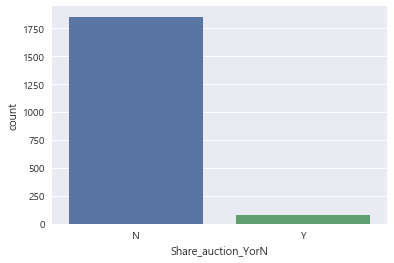

In [8]:
sns.countplot(df.Share_auction_YorN)

In [9]:
def Share_acutcion (x):
    if x == "N":
        return 1 #지분경매 여부가 N(No)이면 1
    else:
        return 0 #지분경매 여부가 Y(Yes)이면 0 (Y 경우가 더 많으므로 else로 넘김)

In [10]:
df['Share_auction_YorN'] = df['Share_auction_YorN'].apply(Share_acutcion)
#df에 적용

In [11]:
df['Share_auction_YorN'].value_counts()
#encoding한 data개수와 encoding전 개수가 같음을 확인

1    1854
0      79
Name: Share_auction_YorN, dtype: int64

## 2nd


#### pint.y(위도) => 서울 : 0, 부산: 1

1주차 EDA 과제에서 만든 feature 사용 : 위도에 따른 지역 분류

지역을 Encoding

In [12]:
df['point.y'].value_counts() #위도 별 data 개수

37.554734    27
35.201112    15
37.534208    12
35.151465     9
35.127808     8
             ..
37.484609     1
35.319103     1
37.606503     1
37.576571     1
37.592180     1
Name: point.y, Length: 1416, dtype: int64

In [13]:
df['addr_do'].value_counts() #지역 명칭 별 data 개수

서울    1242
부산     691
Name: addr_do, dtype: int64

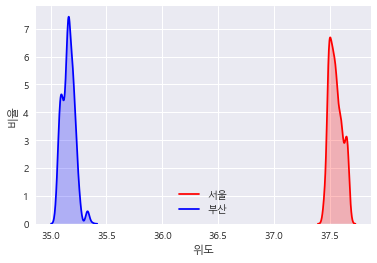

In [14]:
g = sns.kdeplot(df.query('addr_do == "서울"')['point.y'], color = "red",shade= True)
g = sns.kdeplot(df.query('addr_do == "부산"')['point.y'], color = 'blue', shade = True)
g.set_xlabel('위도') # matplotlib의 xlabel
g.set_ylabel('비율')
g = g.legend(['서울','부산'])
plt.show()

35.5도 이하이면 부산, 그외의 값을 가지면 서울임을 알 수 있다.

In [15]:
"""
1주차 과제 : 위도에 따른 지역 분류

def y(y):
    if  y < 35.5:
        return '부산'
    else:
        return '서울'

df['point.y'] = df['point.y'].apply(y)
"""

"\n1주차 과제 : 위도에 따른 지역 분류\n\ndef y(y):\n    if  y < 35.5:\n        return '부산'\n    else:\n        return '서울'\n\ndf['point.y'] = df['point.y'].apply(y)\n"

In [16]:
def encoding_add(y):
    if y < 35.5:
        return 1 #부산이면 1
    else:
        return 0 #서울이면 0 (서울인 경우가 더 많으므로 else로 처리)
    

In [17]:
df['point.y'] = df['point.y'].apply(encoding_add)
#df에 적용

In [18]:
df['point.y'].value_counts()
#encoding한 data개수와 encoding전 개수가 같음을 확인

0    1242
1     691
Name: point.y, dtype: int64

## 3rd


#### Auction_class(경매구분) => 강제:0 임의:1

In [19]:
df.Auction_class.value_counts()

임의    1439
강제     494
Name: Auction_class, dtype: int64

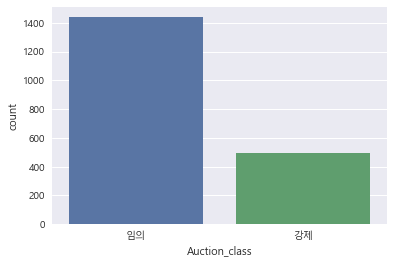

In [20]:
sns.countplot(df.Auction_class)

In [21]:
def Auction_class (x):
    if x == "강제":
        return 0 #경매 구분이 "강제"이면 0 
    else:
        return 1 #경매 구분이 "임의"이면 1 (임의인 경우가 더 많으므로 else로 넘김)

In [22]:
df.Auction_class = df.Auction_class.apply(Auction_class)
#df에 적용

In [23]:
df.Auction_class.value_counts()
#encoding한 data개수와 encoding전 개수가 같음을 확인

1    1439
0     494
Name: Auction_class, dtype: int64

## 4th


#### Bid_class(입찰구분) =>  일괄, 개별, 일반 one hot encoding

1주차 EDA 과제에서 만든 feature 사용 : 입찰 구분
입찰 구분에는 일괄, 개별, 일반이 있다.
변수가 이상이므로 One-hot Encoding을 사용해 보았다.

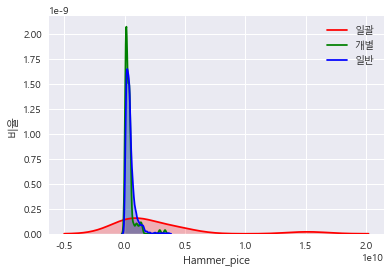

In [24]:
g = sns.kdeplot(df.query('Bid_class == "일괄"')['Hammer_price'], color = "red",shade= True)
g = sns.kdeplot(df.query('Bid_class == "개별"')['Hammer_price'], color = "green",shade= True)
g = sns.kdeplot(df.query('Bid_class == "일반"')['Hammer_price'], color = "blue",shade= True)

g.set_xlabel('Hammer_pice') # matplotlib의 xlabel
g.set_ylabel('비율')
g = g.legend(['일괄','개별','일반'])
plt.show()

In [25]:
df['Bid_class']

0       개별
1       일반
2       개별
3       일반
4       일반
        ..
1928    일반
1929    일반
1930    일반
1931    일반
1932    일반
Name: Bid_class, Length: 1933, dtype: object

In [26]:
dummy_Bid_class = pd.get_dummies(df['Bid_class'],prefix='Bid_class')
dummy_Bid_class
#Bid_class를 one-hot encoding하기

,Bid_class_개별,Bid_class_일괄,Bid_class_일반
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
1928,0,0,1
1929,0,0,1
1930,0,0,1
1931,0,0,1


In [27]:
df = pd.concat([df.drop('Bid_class', axis=1),dummy_Bid_class],axis = 1)
#기존의 Bid_class를 삭제하고 encoding된 column들을 추가

## 5th


#### 건물 층수 one-hot encoding

1주차 EDA 과제에서 만든 feature 사용 : 건물층수
건물의 층수로 저층건물, 준초고층건물, 초고층건물로 나눌 수 있다. 
건축법규에 의하면 30층~46층 사이의 건물을 준초고층건물, 50층 이상의 건물을 초고층건물로 규정한다.
연속형 변수인 건물 층수를 범주형 변수로 바꾸고 encoding을 해보았다.

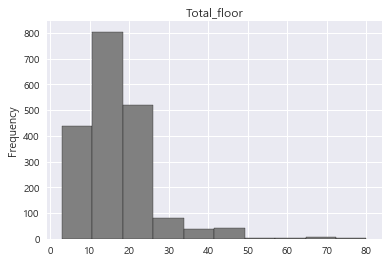

In [28]:
df['Total_floor'].plot.hist(bins=10,color='grey',edgecolor='black')
plt.title('Total_floor')
plt.show()

In [29]:
"""
1주차 과제 : 층수에 따른 건물 분류
"""

def floor(x):
    if 30 <= x < 50:
        return '준초고층건물'
    elif 50 <= x :
        return '초고층건물'
    else:
        return '저층건물'


df['Total_floor_idx'] = df['Total_floor'].apply(floor)


In [30]:
df['Total_floor_idx'].value_counts()

저층건물      1801
준초고층건물     114
초고층건물       18
Name: Total_floor_idx, dtype: int64

In [31]:
dummy_T_floor = pd.get_dummies(df['Total_floor_idx'], prefix='Total_floor')
dummy_T_floor
#Total floor를 one-hot encoding하기

,Total_floor_저층건물,Total_floor_준초고층건물,Total_floor_초고층건물
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1928,1,0,0
1929,1,0,0
1930,0,1,0
1931,1,0,0


In [32]:
df = pd.concat([df.drop('Total_floor_idx', axis=1),dummy_T_floor],axis = 1)
#기존의 Total floor를 삭제하고 encoding된 column들을 추가

In [33]:
df

,Auction_key,Auction_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,...,Close_result,point.y,point.x,Hammer_price,Bid_class_개별,Bid_class_일괄,Bid_class_일반,Total_floor_저층건물,Total_floor_준초고층건물,Total_floor_초고층건물
0,2687,1,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,...,배당,1,129.137048,760000000,1,0,0,0,1,0
1,2577,1,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,...,배당,1,129.145068,971889999,0,0,1,0,0,1
2,2197,1,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,...,배당,1,128.996765,93399999,1,0,0,1,0,0
3,2642,1,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,...,배당,1,129.089081,256899000,0,0,1,1,0,0
4,1958,0,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,...,배당,1,128.998874,158660000,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,0,280000000,삼창감정,2017-02-16 00:00:00,1,0,66419.3,40.55,40.55,...,배당,0,127.048683,402500000,0,0,1,1,0,0
1929,1295,1,200000000,삼상감정,2015-02-21 00:00:00,2,1,20433.8,39.60,39.60,...,배당,0,127.077063,430234600,0,0,1,1,0,0
1930,254,1,354805459,서초감정,2016-10-21 00:00:00,2,1,7460.8,19.03,19.03,...,배당,0,126.981994,1118999990,0,0,1,0,1,0
1931,1486,0,80000000,한미감정,2016-06-17 00:00:00,2,1,16875.8,42.20,42.20,...,배당,0,127.028002,403000000,0,0,1,1,0,0


# EDA

## 상관관계 확인

heatmap을 통해 모든 연속형 변수 간의 상관관계를 확인할 수 있다. 
seaborn의 함수를 통하여 Heatmap을 생성한다.

상관계수의 절댓값은 0~1 사이인데, 절댓값이 1에 가까울수록 상관관계가 크다고 판단한다.
1에 가까울 수록 양의 상관관계(비례)가 크고, -1에 가까울 수록 음의 상관관계(반비례)가 크다.



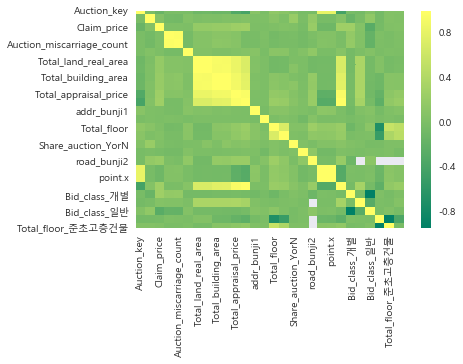

In [34]:
sns.heatmap(df.corr(),cmap='summer')
plt.show()

위의 heatmap을 보면 우리가 원하는 target변수 Hammer_price가 사라졌다. 
왜인지 잘 모르겠다.
endcoding하지 않은 원래의 data의 heatmap을 확인해 보자

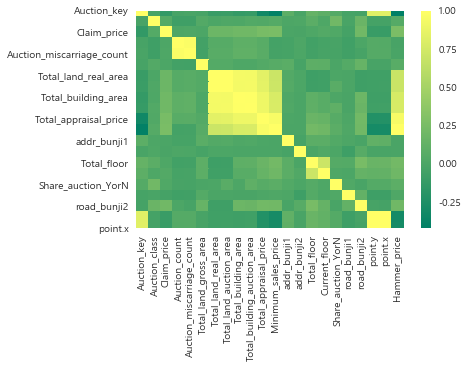

In [35]:
sns.heatmap(df_copy.corr(),cmap='summer') #encoding하기 전 df를 df_copy에 복사해 두었다
plt.show()

위의 Heatmap을 보면, 노란색(1)에 가까울 수록 양의 상관관계가 크고 초록색(-1)에 가까울 수록 음의 상관관계가 크다는 것을 알 수 있다.

target 변수인 Hammer price와 양의 상관관계가 큰 변수는 Total_appraisal_price, Minimum_sales_price 등이 있는 것으로 보인다.

수치적으로 확인해 

In [36]:
df.corr()['Hammer_price']

Auction_key                   -0.418769
Auction_class                  0.054813
Claim_price                    0.267728
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
Total_land_gross_area          0.070466
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
addr_bunji1                   -0.003139
addr_bunji2                   -0.003641
Total_floor                    0.220830
Current_floor                  0.198013
Share_auction_YorN             0.091157
road_bunji1                    0.020404
road_bunji2                    0.206681
point.y                       -0.306488
point.x                       -0.296312
Hammer_price                   1.000000
Bid_class_개별                  -0.051092
Bid_class_일괄                   0.321237
Bid_class_일반                  -0.049359


값이 1에 가까운 Minimum_sales_price(0.994592),Total_appraisal_price(0.953464),Total_building_auction_area(0.772839),Total_building_area(0.768454)와 Hammer_price의 관계를 시각화 해보았다.
(산점도로 비교할 때, y축이 Hammer price이다.)

### 1. Minimum_sales_price (최저매각가격)
Heatmap에서 Hammer_price와 Minimum_sales_price의 양의 상관관계가 큰것을 확인할 수 있었다.

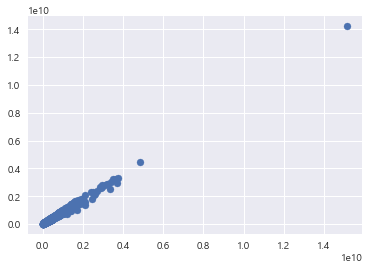

In [37]:
# 둘다 음수거나 너무 튀는 이상치 발견 가능
plt.scatter(x=df['Hammer_price'],y=df['Minimum_sales_price'],label='Minimum_sales_price')
plt.show()

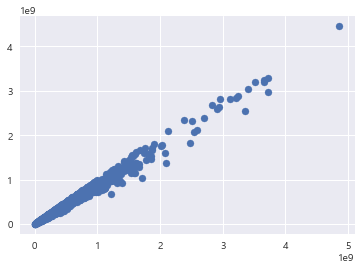

In [38]:
#이상치를 제거한 산점도
df = df.query('Hammer_price<6e9 &  Minimum_sales_price<6e9')
plt.scatter(x=df['Hammer_price'],y=df['Minimum_sales_price'],label='Minimum_sales_price')
plt.show()

이상치를 제거한 산점도를 확인하면, 거의 기울기 1을 가지고 증가하는 것을 확인할 수 있고 Hammer pice와 Minimum_sales_price는 비례한다는 것을 알 수 있다.

### 2. Total_appraisal_price (총감정가)
위와 마찬가지로, Heatmap에서 Hammer_price와 Total_appraisal_price의 양의 상관관계가 큰것을 확인할 수 있었다.
낙찰가와 총 감정가가 비례함을 알 수 있다.

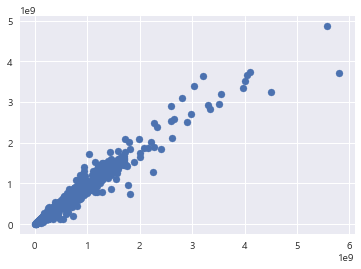

In [39]:
plt.scatter(x=df['Total_appraisal_price'],y=df['Hammer_price'])
plt.show()

거의 기울기 1을 가지고 증가하는 것을 확인할 수 있고 Hammer pice와 Total_appraisal_price는 비례한다는 것을 알 수 있다.

### 3. Total_building_auction_area (총토지경매면적(㎡))
위와 마찬가지로, Heatmap에서 Hammer_price와 Total_appraisal_price의 양의 상관관계가 큰것을 확인할 수 있었다.
낙찰가와 총 감정가가 비례함을 알 수 있다.

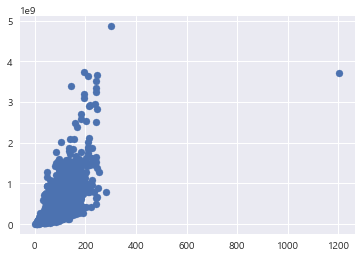

In [41]:
plt.scatter(y=df['Hammer_price'],x=df['Total_building_auction_area'])
plt.show()

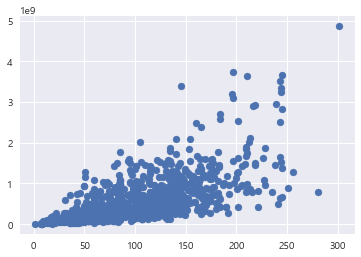

In [42]:
#이상치를 제거한 산점도, x축과 y축의 단위가 다름을 주의
df = df.query('Total_building_area<400')
plt.scatter(y=df['Hammer_price'],x=df['Total_building_auction_area'])
plt.show()

### 4.Total_building_area (총건물면적(㎡))


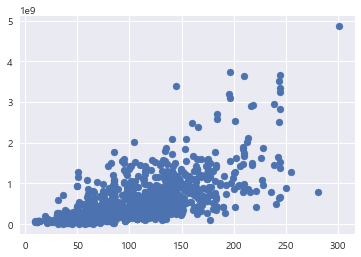

In [43]:
plt.scatter(y=df['Hammer_price'],x=df['Total_building_area'])
plt.show()

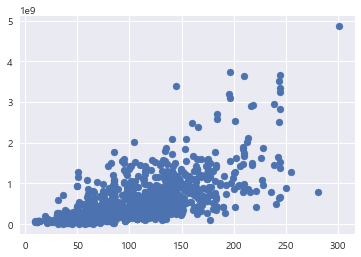

In [44]:
#이상치를 제거한 산점도, x축과 y축의 단위가 다름을 주의
df = df.query('Total_building_area<400')
plt.scatter(y=df['Hammer_price'],x=df['Total_building_area'])
plt.show()

이상치를 제외하고 총건물면적이 300㎡이하이며 대부분 총건물면적, 총토지면적이 작을수록 낙찰가도 낮은것을 확인할 수 있다.

In [45]:
df.head()

,Auction_key,Auction_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,...,Close_result,point.y,point.x,Hammer_price,Bid_class_개별,Bid_class_일괄,Bid_class_일반,Total_floor_저층건물,Total_floor_준초고층건물,Total_floor_초고층건물
0,2687,1,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,...,배당,1,129.137048,760000000,1,0,0,0,1,0
1,2577,1,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,...,배당,1,129.145068,971889999,0,0,1,0,0,1
2,2197,1,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,...,배당,1,128.996765,93399999,1,0,0,1,0,0
3,2642,1,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,...,배당,1,129.089081,256899000,0,0,1,1,0,0
4,1958,0,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,...,배당,1,128.998874,158660000,0,0,1,1,0,0


In [46]:
X = df[['Auction_class','Claim_price','Auction_count','Auction_miscarriage_count','Total_land_gross_area','Total_land_real_area',
'Total_land_auction_area','Total_building_area','Total_building_auction_area','Total_appraisal_price',
'Minimum_sales_price','Total_floor','Current_floor','Share_auction_YorN','point.y','point.x']]
#문자/날짜/one-hot encoding data 제외
y = df.Hammer_price


In [47]:
X.shape, y.shape

((1931, 16), (1931,))

In [48]:
X.head()

,Auction_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,Share_auction_YorN,point.y,point.x
0,1,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,45,5,1,1,129.137048
1,1,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,70,51,1,1,129.145068
2,1,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,15,14,1,1,128.996765
3,1,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,20,11,1,1,129.089081
4,0,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,7,7,1,1,128.998874


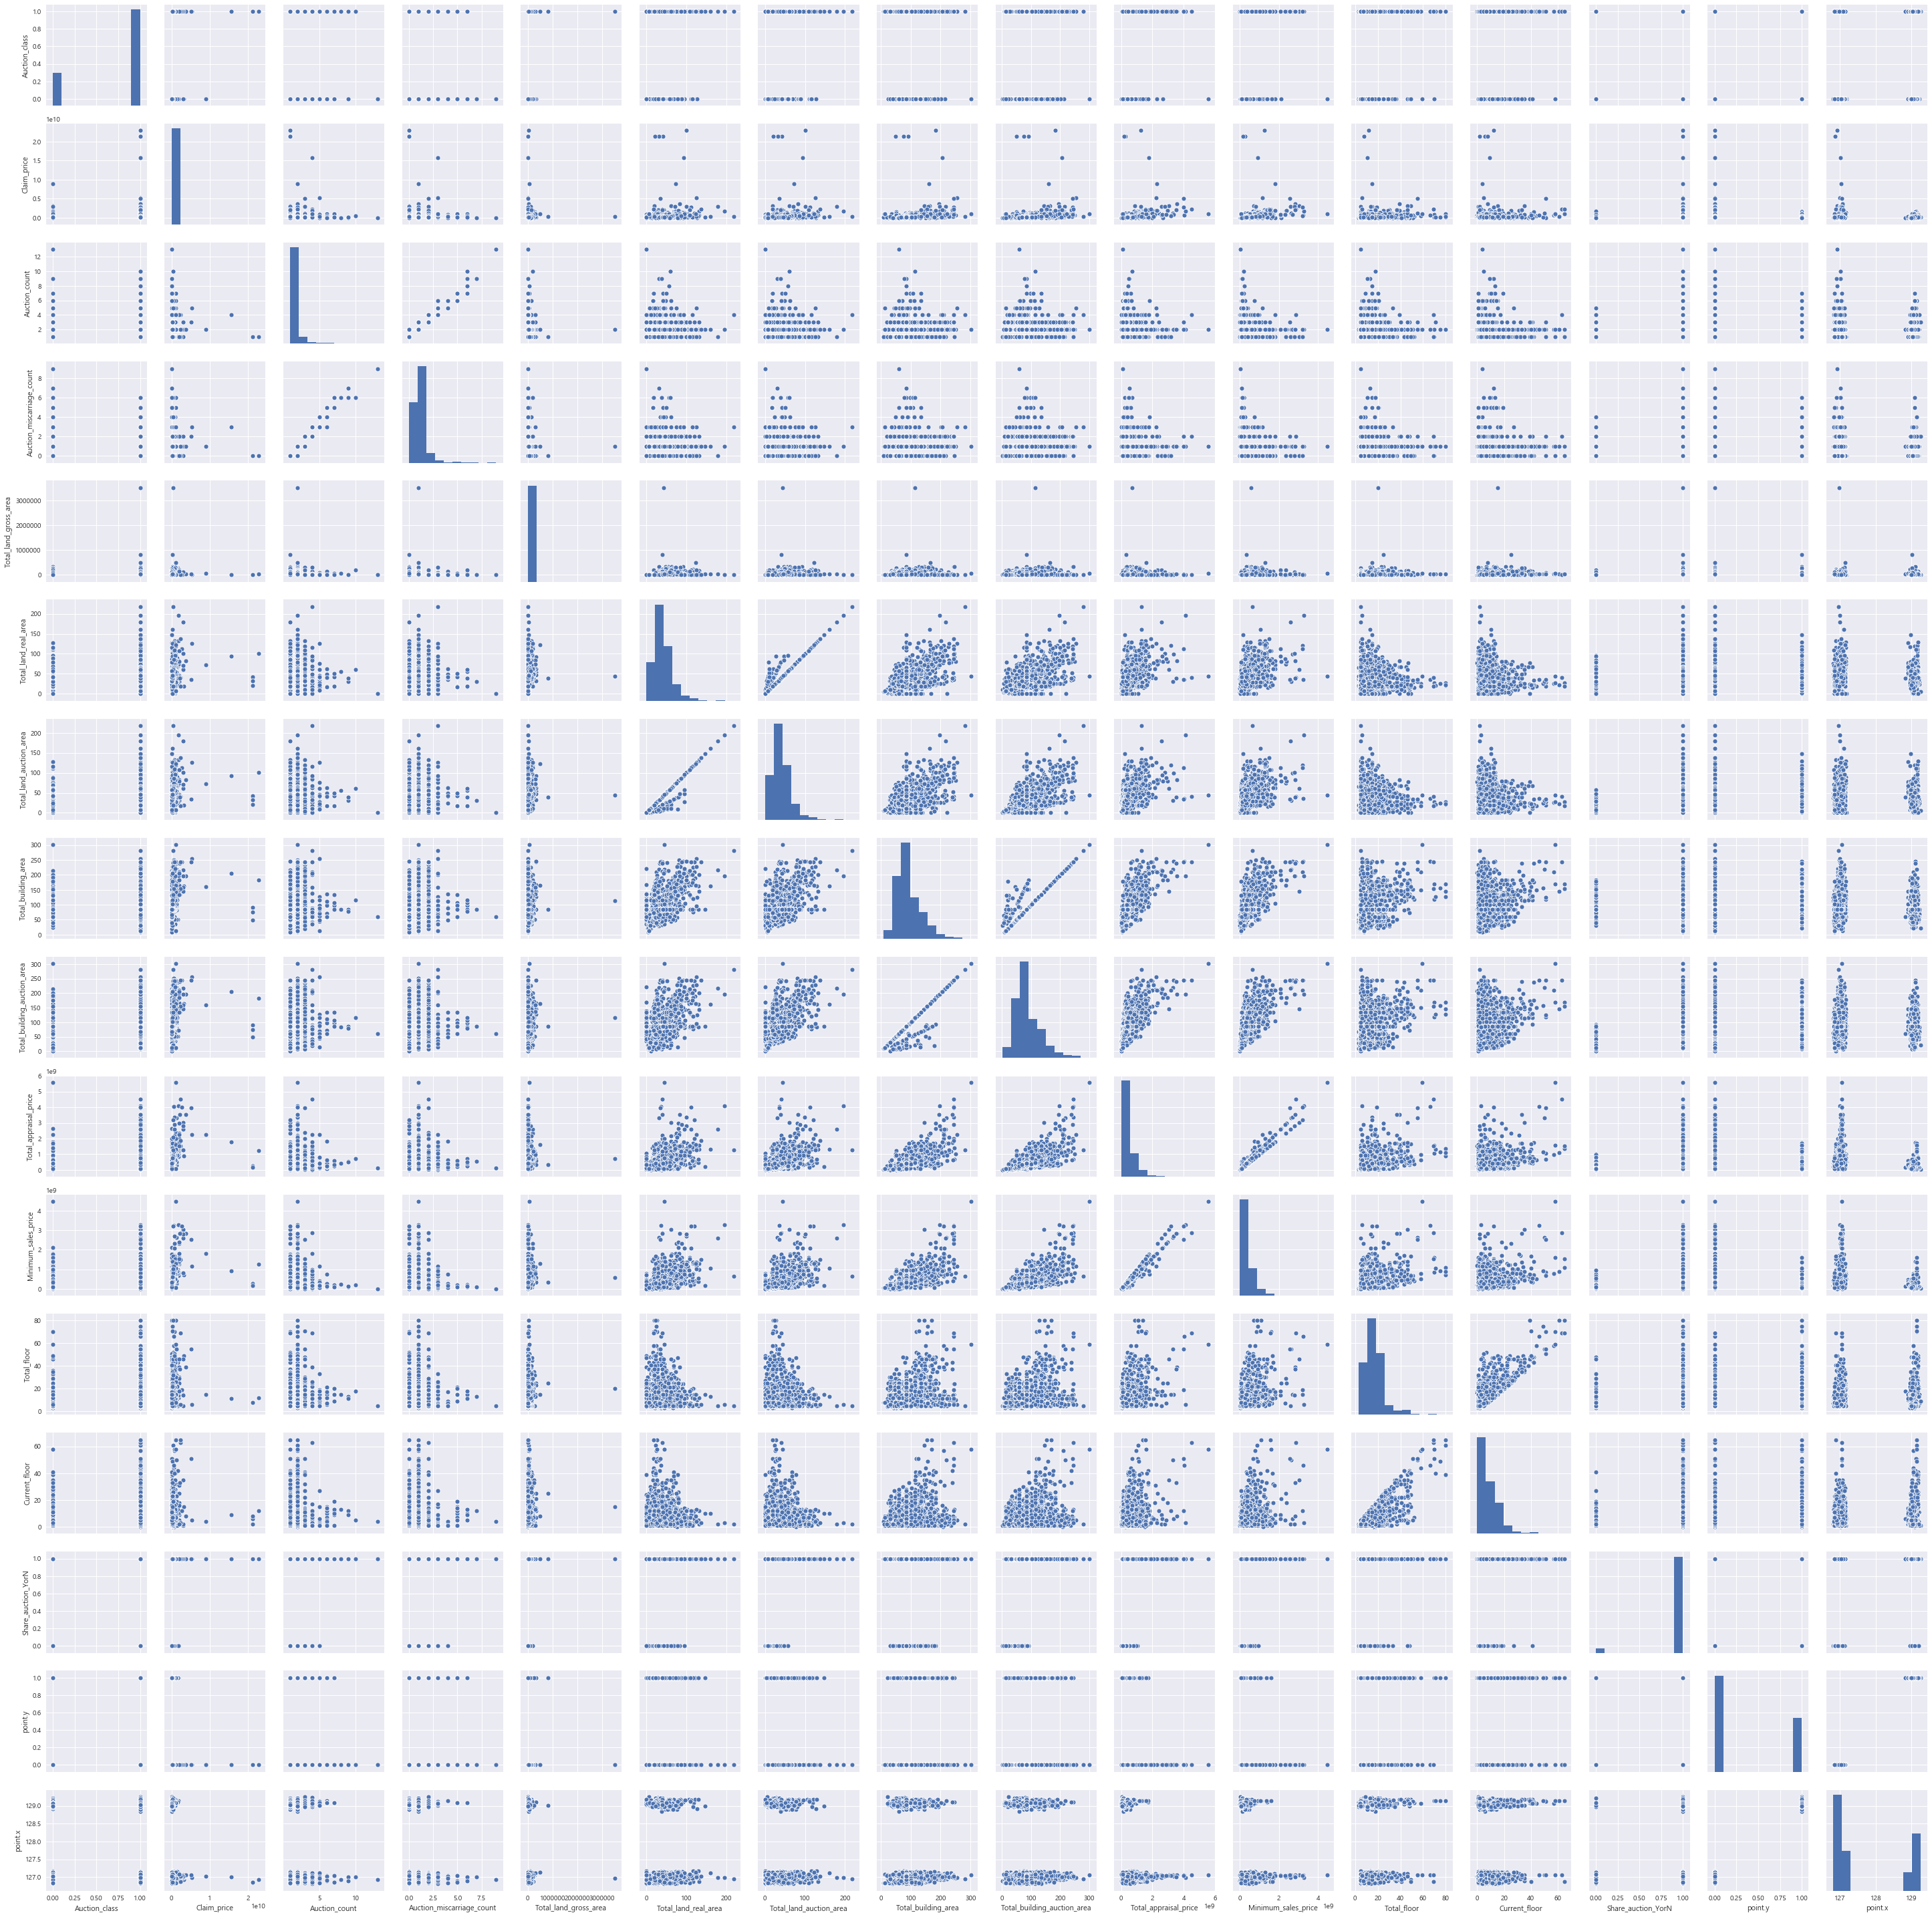

In [49]:
sns.pairplot(X)

너무 많다 ㅠㅠㅠㅠ

In [50]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])


,VIF Factor,features
15,176.609389,point.x
6,127.691973,Total_land_auction_area
8,124.413122,Total_building_auction_area
5,122.220288,Total_land_real_area
7,114.731946,Total_building_area
9,88.522992,Total_appraisal_price
10,87.460721,Minimum_sales_price
3,19.750673,Auction_miscarriage_count
2,18.868300,Auction_count
13,6.014806,Share_auction_YorN


VIF Factor가 10 이상인 
Total_land_auction_area, Total_land_real_area,Total_building_auction_area, Total_building_area, Total_appraisal_price, Minimum_sales_price, Total_building_area,  point.x, Auction_miscarriage_count, Auction_count는
다중공선성이 있다고 판단

encoding한 Auction_count,Auction_class,point.y는 다중공선성이 없다.
(point.y(위도)와 비슷한 data인 point.x(경도)는 VIF Factor가 176.609389로 매우 크다 )

# 선형회귀분석

## 1st

In [51]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#fit된 모델의 R-square
model.score(X_train, y_train)

0.9878459988716689

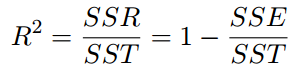
0≤R-squre≤1
R-squre = 0.0.9878459988716689으로 1에 가깝다
음 좋은 모델이구만

In [54]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2605623560357421.0

### MSE 행렬로 구하기
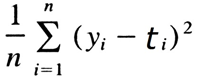

In [55]:
def mean_squared_error(y, t):
    return ((y-t)**2).mean(axis=None)

mean_squared_error(y_train, model.predict(X_train))

2605623560357423.0

같은 결과 도출

In [56]:
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[-1.41178820e+06  2.36725694e-03 -2.30748201e+07  2.91952351e+07
  1.65249308e+01  4.30506065e+05 -2.86806783e+04 -4.78599172e+04
 -2.16326212e+05  1.92495346e-01  8.97332601e-01  1.90561009e+05
 -4.24065179e+05  2.01805355e+07 -7.34062748e+07  3.11192875e+07]
-3934904173.5642605


In [57]:
#test데이터 예측
model.predict(X_test)

array([4.40887994e+08, 8.81164582e+07, 1.61340080e+08, 1.91191908e+08,
       6.92904054e+08, 8.13743206e+07, 6.04963428e+08, 2.58014883e+08,
       9.83576795e+08, 3.23094305e+08, 7.41488824e+08, 1.97093272e+08,
       4.52358486e+08, 3.64550093e+08, 1.05024269e+08, 2.41144795e+08,
       9.56233522e+07, 1.47598606e+08, 8.51562031e+08, 1.28558701e+09,
       4.44432090e+08, 2.20752576e+08, 2.46359890e+08, 1.93953120e+08,
       1.56292716e+08, 1.46858267e+08, 5.81311037e+08, 4.80496143e+08,
       4.02744059e+08, 4.09996225e+07, 3.92531890e+08, 3.30460853e+08,
       9.93251863e+08, 4.47425347e+08, 4.02489255e+08, 3.39874859e+08,
       4.86127049e+08, 6.35008381e+08, 5.78387376e+08, 8.51617089e+08,
       9.66308135e+08, 5.10885614e+07, 3.03185401e+08, 2.41851029e+07,
       3.74026767e+08, 9.99031325e+08, 1.75825273e+08, 1.30994934e+09,
       7.89908365e+08, 1.21175531e+08, 3.05447059e+08, 9.13706913e+08,
       1.37449871e+08, 3.23185068e+08, 9.14306032e+08, 1.75924707e+08,
      

In [58]:
#test데이터 R-square
model.score(X_test, y_test)

0.9781681219856473

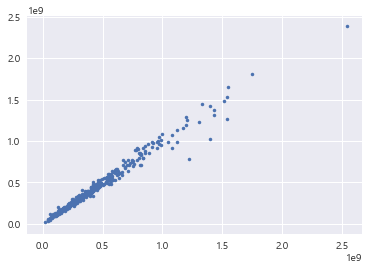

In [59]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [60]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.50614e-22): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>

In [62]:
#R-square
ridge.score(X_train,y_train)

0.9878413500651024

In [63]:
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.08729e-22): result may not be accurate.
  overwrite_a=True).T


0.9878452609431605

In [64]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0115414935974234e+18, tolerance: 3.310089191792145e+16
  positive)


0.9878459987369439

모든 회귀계수가 1에 가깝게 크게 나온것으로 보아 적합한 모델이라고 판단된다

## 2nd

In [65]:
X.columns

Index(['Auction_class', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'Total_floor',
       'Current_floor', 'Share_auction_YorN', 'point.y', 'point.x'],
      dtype='object')

In [66]:
X['Hammer_price'] = df['Hammer_price']
X['point_x'] = df['point.x']
X['point_y'] = df['point.y']

X.drop('point.x', axis=1)
X.drop('point.y', axis=1)
#원래 data df에서 제외한 변수가 많아서 X에 target변수만 추가
#OLS.from_formula에서 point.x를 한str로 인식하지 못해서 이름 변경

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

,Auction_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,Share_auction_YorN,point.x,Hammer_price,point_x,point_y
0,1,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,45,5,1,129.137048,760000000,129.137048,1
1,1,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,70,51,1,129.145068,971889999,129.145068,1
2,1,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,15,14,1,128.996765,93399999,128.996765,1
3,1,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,20,11,1,129.089081,256899000,129.089081,1
4,0,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,7,7,1,128.998874,158660000,128.998874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0,280000000,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,21,15,1,127.048683,402500000,127.048683,0
1929,1,200000000,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,23,23,1,127.077063,430234600,127.077063,0
1930,1,354805459,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,32,19,1,126.981994,1118999990,126.981994,0
1931,0,80000000,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,15,11,1,127.028002,403000000,127.028002,0


In [67]:
X.columns

Index(['Auction_class', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'Total_floor',
       'Current_floor', 'Share_auction_YorN', 'point.y', 'point.x',
       'Hammer_price', 'point_x', 'point_y'],
      dtype='object')

In [68]:
import statsmodels.api as sm

reg = sm.OLS.from_formula("Hammer_price ~ Auction_class+Claim_price+Auction_count+Auction_miscarriage_count+Total_land_gross_area+Total_land_real_area+Total_land_auction_area+Total_building_area+Total_building_auction_area+Total_appraisal_price+Minimum_sales_price+Total_floor+Current_floor+Share_auction_YorN+point_x+point_y", X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Hammer_price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     8941.
Date:                Thu, 30 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:54:25   Log-Likelihood:                -36994.
No. Observations:                1931   AIC:                         7.402e+04
Df Residuals:                    1914   BIC:                         7.412e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -3.506e+09    1.9e+09     -1.848      0.065   -7.23e+09    2.15e+08
Auction_class               -3.582e+06   2.77e+06     -1.294      0.196   -9.01e+06    1.85e+06
Claim_price                     0.0031      0.001      3.461      0.001       0.001       0.005
Auction_count               -2.351e+07   5.37e+06     -4.374      0.000   -3.41e+07    -1.3e+07
Auction_miscarriage_count    2.872e+07    6.2e+06      4.632      0.000    1.66e+07    4.09e+07
Total_land_gross_area          18.4301     12.642      1.458      0.145      -6.363      43.223
Total_land_real_area         5.067e+05   5.54e+05      0.915      0.360   -5.79e+05    1.59e+06
Total_land_auction_area     -2.034e+05    5.6e+05     -0.363      0.717    -1.3e+06    8.95e+05
Total_building_area         -1.008e+05   2.99e+05     -0.337      0.736   -6.88e+05    4.86e+05
Total_building_auction_area -1.536e+05   3.03e+05     -0.507      0.612   -7.48e+05    4.41e+05
Total_appraisal_price           0.1984      0.016     12.249      0.000       0.167       0.230
Minimum_sales_price             0.8946      0.019     46.556      0.000       0.857       0.932
Total_floor                  2.693e+05   1.95e+05      1.384      0.166   -1.12e+05    6.51e+05
Current_floor               -5.606e+05   2.07e+05     -2.711      0.007   -9.66e+05   -1.55e+05
Share_auction_YorN            2.15e+07   1.43e+07      1.502      0.133   -6.58e+06    4.96e+07
point_x                      2.776e+07   1.49e+07      1.857      0.063   -1.56e+06    5.71e+07
point_y                     -6.422e+07   3.11e+07     -2.063      0.039   -1.25e+08   -3.16e+06
==============================================================================
Omnibus:                     1229.924   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50161.526
Skew:                           2.397   Prob(JB):                         0.00
Kurtosis:                      27.504   Cond. No.                     2.33e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P>|t|의 값이 작은것이 유의미한 변수이다.(0.05이하)
Claim_price	, Current_floor, Current_floor등이 유의미한 변수로 생각된다.
(?0인건 무슨의미인가용?)